In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom as binomial_dist
from scipy.special import binom, factorial

from graph_generators import generate_random_graph, generate_watts_strogatz, generate_barabasi_albert_graph

# Random Graph

In [2]:
n, p = 2000, 0.2

G = generate_random_graph(n, p)

#### Number of nodes

In [3]:
len(G.vertList)

2000

#### Number of edges

In [4]:
len(G.getEdges())

798878

#### Average degree

In [5]:
degrees = list(G.getDegrees().values())

np.mean(degrees)

399.439

In [6]:
np.std(degrees)

17.694102944201493

#### Frequency plot

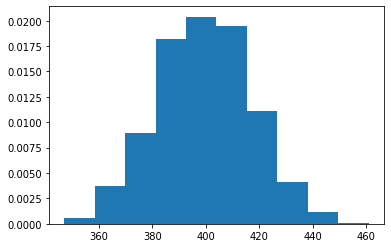

In [7]:
plt.hist(degrees, density=True)
plt.show()

#### Model distribution

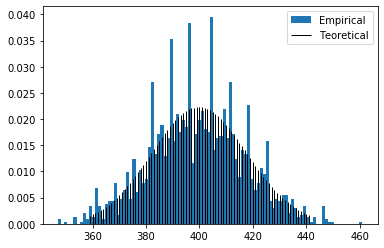

In [8]:
plt.hist(degrees, density=True, bins=len(set(degrees)), label='Empirical')

rv = binomial_dist(n, p)
x = np.arange(binomial_dist.ppf(0.01, n, p), binomial_dist.ppf(0.99, n, p))
plt.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='Teoretical')

plt.legend()
plt.show()

# Watts-Strogatz

In [9]:
n, k, p = 2000, 40, 0.8

G = generate_watts_strogatz(n, k, p)

#### Number of nodes

In [10]:
len(G.vertList)

2000

#### Number of edges

In [11]:
len(G.getEdges())

78738

#### Average degree

In [12]:
degrees = list(G.getDegrees().values())

np.mean(degrees)

39.369

In [13]:
np.std(degrees)

5.117991695968254

#### Frequency plot

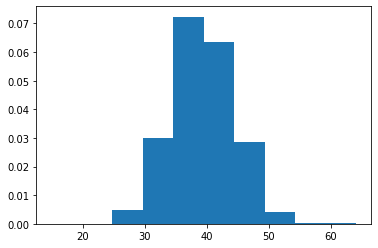

In [14]:
plt.hist(degrees, density=True)
plt.show()

#### Degree distribution

In [15]:
def P(k, KatZero, beta):
    Kp = KatZero//2
    fkk = min(k-Kp, Kp)
    vals = [binom(Kp, i)*((1-beta)**i)*(beta**(Kp-i))*((beta*Kp)**(k-Kp-i))/factorial(k-Kp-i)*np.exp(-beta*Kp) for i in range(fkk)]
    return sum(vals)

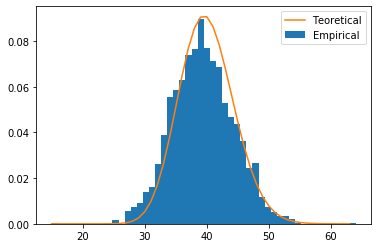

In [16]:
ranges = list(range(min(degrees), max(degrees)))
values = [P(i, k, p) for i in ranges]

plt.hist(degrees, density=True, bins=50, label='Empirical')
plt.plot(ranges, values, label='Teoretical')
plt.legend()
plt.show()

# Barabasi Albert

In [17]:
n, m = 5000, 30

G = generate_barabasi_albert_graph(n, m)

#### Number of nodes

In [18]:
len(G.vertList)

5000

#### Number of edges

In [19]:
len(G.getEdges())

10810

#### Average degree

In [20]:
degrees = list(G.getDegrees().values())

np.mean(degrees)

2.162

In [21]:
np.std(degrees)

7.980460888946201

#### Frequency plot

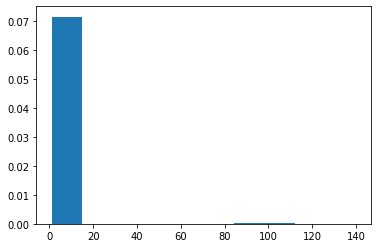

In [22]:
plt.hist(degrees, density=True)
plt.show()

#### Degree distribution

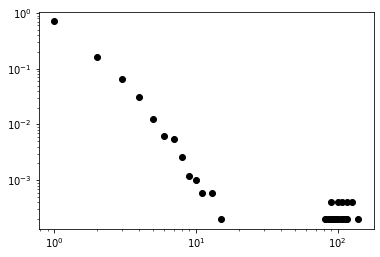

In [23]:
dist = np.bincount(degrees)/np.sum(np.bincount(degrees))
deg = np.arange(len(dist))

plt.loglog(deg, dist, 'ko')
plt.show()

#### Tail of distribution

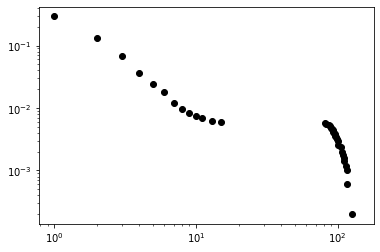

In [24]:
def ecdf(values, x):
    return sum([1 for el in values if el <= x])/len(values)


unique_degrees = list(set(degrees))
tail_proba = [1 - ecdf(degrees, el) for el in unique_degrees]

plt.loglog(unique_degrees, tail_proba, 'ko')
plt.show()